# Building a basic image classifier on pets, built in data.

In [33]:
# run constants
bs = 16
size = 224
normalize = True
model = models.resnet34

## Get data
* nb setups
* imports
* get data

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.metrics import error_rate

In [4]:
Config.data_path()

PosixPath('/home/CW01/uia94835/.fastai/data')

In [5]:
doc(untar_data)

untar_data [source] [test] untar_data ( url : str , fname : PathOrStr = None , dest : PathOrStr = None , data = True , force_download = False ) → Path 
 
 × Tests found for untar_data : pytest -sv tests/test_datasets.py::test_load_config [source] pytest -sv tests/test_datasets.py::test_user_config [source] pytest -sv tests/test_vision_data.py::test_trunc_download [source] To run tests please refer to this guide . Download url to fname if dest doesn't exist, and un-tgz to folder dest . 
 Show in docs

In [19]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [8]:
untar_path = untar_data(URLs.PETS)
untar_path

PosixPath('/home/CW01/uia94835/.fastai/data/oxford-iiit-pet')

In [9]:
untar_path.ls()

[PosixPath('/home/CW01/uia94835/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/CW01/uia94835/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/home/CW01/uia94835/.fastai/data/oxford-iiit-pet/small-96'),
 PosixPath('/home/CW01/uia94835/.fastai/data/oxford-iiit-pet/small-256')]

In [13]:
img_path = untar_path/'images'
label_path = untar_path/'annotations'

In [14]:
img_fnames = get_image_files(img_path)
img_fnames[:5]

[PosixPath('/home/CW01/uia94835/.fastai/data/oxford-iiit-pet/images/Siamese_87.jpg'),
 PosixPath('/home/CW01/uia94835/.fastai/data/oxford-iiit-pet/images/chihuahua_126.jpg'),
 PosixPath('/home/CW01/uia94835/.fastai/data/oxford-iiit-pet/images/german_shorthaired_97.jpg'),
 PosixPath('/home/CW01/uia94835/.fastai/data/oxford-iiit-pet/images/Bombay_157.jpg'),
 PosixPath('/home/CW01/uia94835/.fastai/data/oxford-iiit-pet/images/Bengal_12.jpg')]

## Examine data

In [15]:
np.random.seed(2)
pattern = r'/([^/]+)_\d+.jpg$'

In [35]:
data = ImageDataBunch.from_name_re(img_path, img_fnames, pattern, ds_tfms = get_transforms(), size=size, bs=64)
if normalize: data = data.normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Siamese,chihuahua,german_shorthaired,Bombay,Bengal
Path: /home/CW01/uia94835/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
shiba_inu,yorkshire_terrier,shiba_inu,saint_bernard,Russian_Blue
Path: /home/CW01/uia94835/.fastai/data/oxford-iiit-pet/images;

Test: None

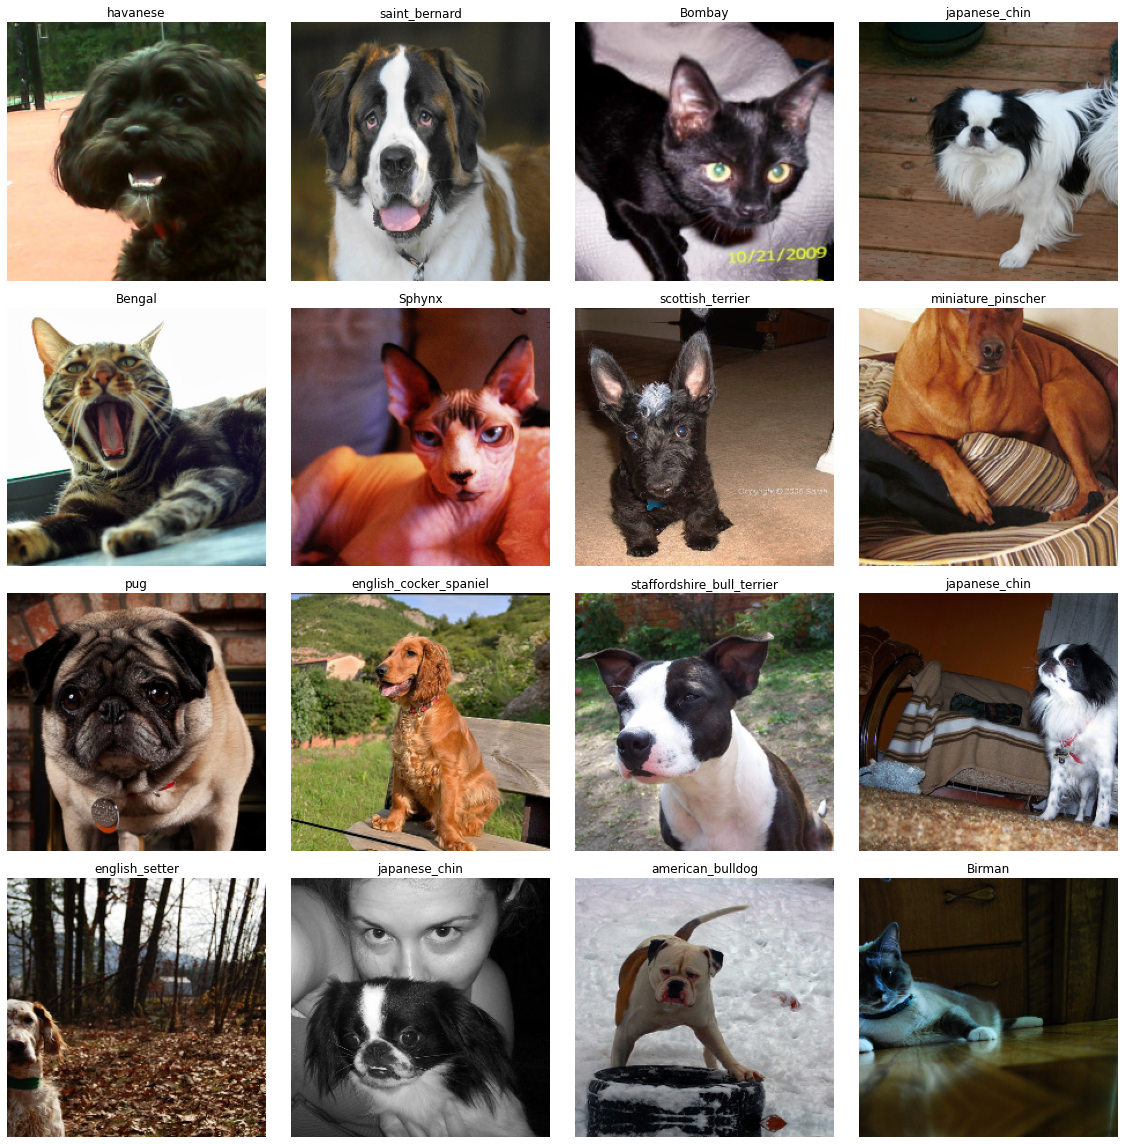

In [36]:
data.show_batch(rows=4)

In [18]:
print(data.c)
print(data.classes)

37
['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


## Set up classifier

In [19]:
learn = cnn_learner(data, model, metrics=error_rate)

In [171]:
data.batch_size

64

In [114]:
learn.data

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100)
y: CategoryList
Siamese,chihuahua,german_shorthaired,Bombay,Bengal
Path: /home/CW01/uia94835/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100)
y: CategoryList
Bengal,boxer,Russian_Blue,keeshond,Birman
Path: /home/CW01/uia94835/.fastai/data/oxford-iiit-pet/images;

Test: None

In [116]:
learn.layer_groups

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
   (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU(inplace=True)
   (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (6): ReLU(inplace=True)
   (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (11): ReLU(inplace=True)
   (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (13): BatchNorm2d(64, eps=1e-05, mom

In [118]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [120]:
learn.metrics

[<function fastai.metrics.accuracy(input: torch.Tensor, targs: torch.Tensor) -> <function NewType.<locals>.new_type at 0x7f15e24d1b00>>]

In [123]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [125]:
learn.opt

OptimWrapper over Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.99)
    eps: 1e-08
    lr: slice(None, 0.003, None)
    weight_decay: 0

Parameter Group 1
    amsgrad: False
    betas: (0.9, 0.99)
    eps: 1e-08
    lr: slice(None, 0.003, None)
    weight_decay: 0

Parameter Group 2
    amsgrad: False
    betas: (0.9, 0.99)
    eps: 1e-08
    lr: slice(None, 0.003, None)
    weight_decay: 0

Parameter Group 3
    amsgrad: False
    betas: (0.9, 0.99)
    eps: 1e-08
    lr: slice(None, 0.003, None)
    weight_decay: 0

Parameter Group 4
    amsgrad: False
    betas: (0.9, 0.99)
    eps: 1e-08
    lr: slice(None, 0.003, None)
    weight_decay: 0

Parameter Group 5
    amsgrad: False
    betas: (0.9, 0.99)
    eps: 1e-08
    lr: slice(None, 0.003, None)
    weight_decay: 0
).
True weight decay: True

## Train classifier

In [93]:
learn = cnn_learner(data, model, metrics=error_rate)
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


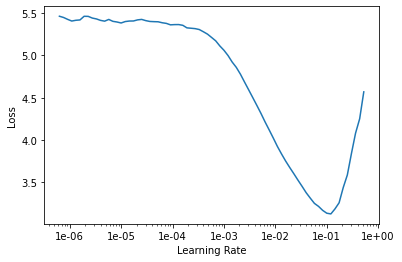

In [94]:
learn.recorder.plot()

In [95]:
learn.fit_one_cycle(4, max_lr = 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.987787,1.031281,0.242896,00:17
1,0.927404,0.655195,0.183356,00:15
2,0.623459,0.320139,0.094046,00:17
3,0.375756,0.237594,0.076455,00:17


In [96]:
learn.save('stage1')

In [89]:
learn.load('stage1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Siamese,chihuahua,german_shorthaired,Bombay,Bengal
Path: /home/CW01/uia94835/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
shiba_inu,yorkshire_terrier,shiba_inu,saint_bernard,Russian_Blue
Path: /home/CW01/uia94835/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 

In [97]:
learn.unfreeze()

In [98]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


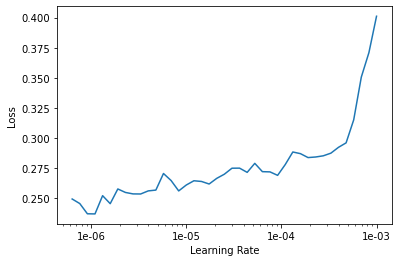

In [99]:
learn.recorder.plot()

In [100]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.284073,0.232491,0.073748,00:21
1,0.273518,0.219124,0.067659,00:21
2,0.235311,0.215091,0.065629,00:20
3,0.226485,0.214896,0.068336,00:19


In [101]:
learn.fit_one_cycle(4, max_lr=slice(1e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.206258,0.211701,0.069012,00:21
1,0.217869,0.216317,0.064276,00:23
2,0.207587,0.211476,0.067659,00:21
3,0.219381,0.214875,0.068336,00:20


In [102]:
learn.fit_one_cycle(4, max_lr=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.215984,0.209518,0.066306,00:20
1,0.211647,0.209763,0.068336,00:19
2,0.218329,0.213490,0.066982,00:19
3,0.195381,0.208935,0.062246,00:19


## Examine results

In [53]:
interp = learn.interpret()
interp

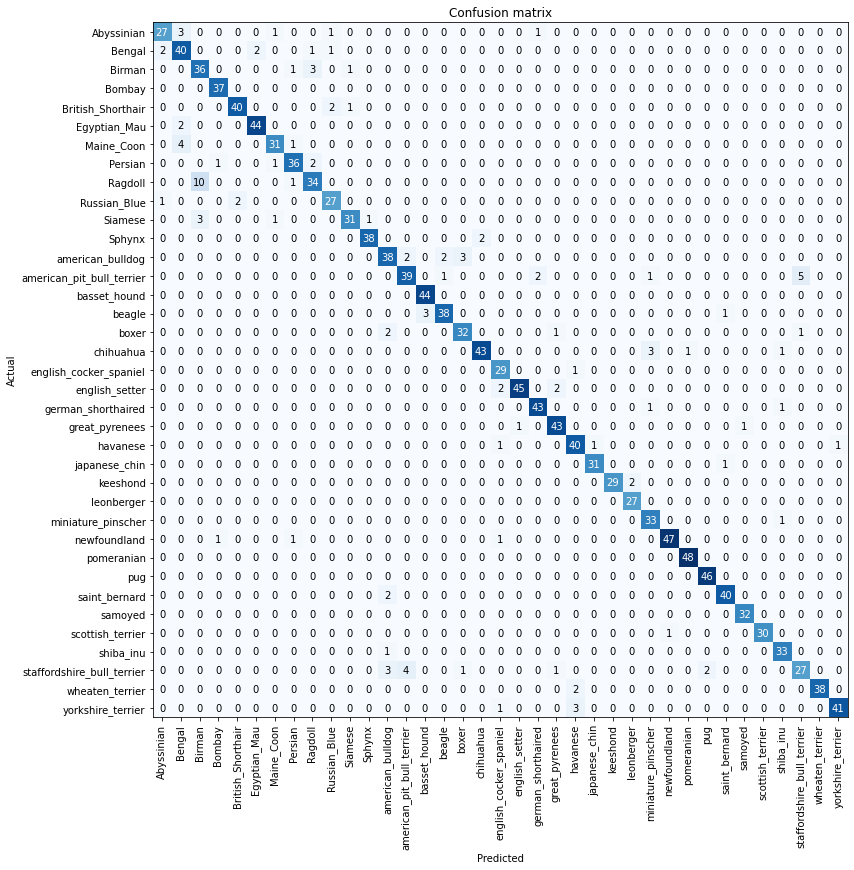

In [82]:
interp.plot_confusion_matrix(figsize=(12,12))

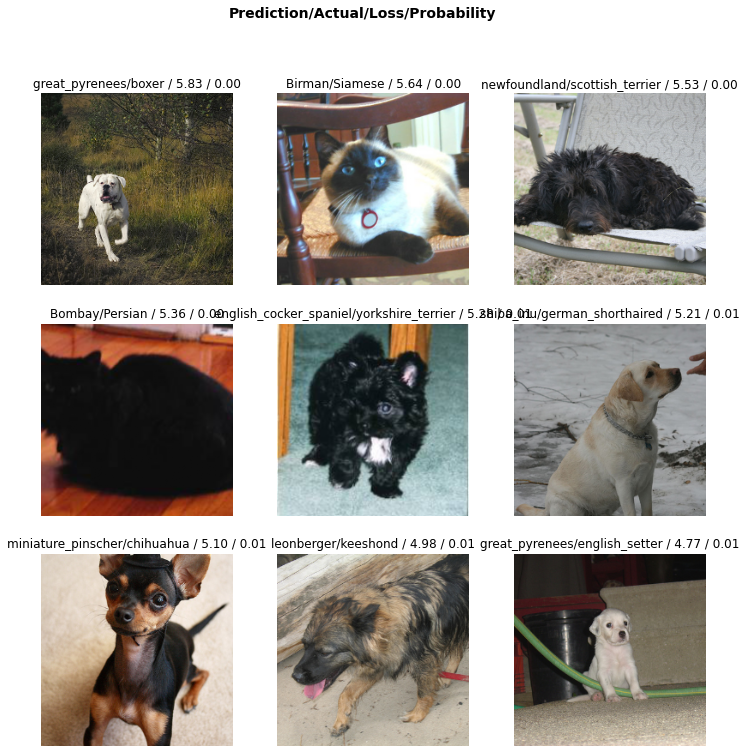

In [67]:
interp.plot_top_losses(9)

In [88]:
interp.most_confused(min_val=3)

[('Ragdoll', 'Birman', 10),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('Maine_Coon', 'Bengal', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Abyssinian', 'Bengal', 3),
 ('Birman', 'Ragdoll', 3),
 ('Siamese', 'Birman', 3),
 ('american_bulldog', 'boxer', 3),
 ('beagle', 'basset_hound', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('yorkshire_terrier', 'havanese', 3)]

## Experiment with
* image resolution vs. batch size -> memory GPU RAM footprint and train time
* what if no image normalization added?

In [141]:
learn.recorder.metrics[-1][0]

tensor(0.0622)